## Sorting rows
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to .sort_values().

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

| Sort on …  |             Syntax |
| --- | --- |
| one column |	           `df.sort_values("breed")` |
| multiple columns |	     `df.sort_values(["breed", "weight_kg"])` | 

By combining `.sort_values()` with `.head()`, you can answer questions in the form, "What are the top cases where…?".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
homelessness = pd.read_csv('../data/21. Pandas Intermedio/homelessness.csv', index_col=0)
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [3]:
# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values("individuals")

# Print the top few rows
homelessness_ind.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358


You can use the ascending argument of .sort_values() to pick the direction of sorting.

In [4]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)
homelessness_fam.head()

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666


In [5]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending=[True, False])

# Print the top few rows
homelessness_reg_fam.head()

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


## Subsetting rows by categorical variables
Subsetting data based on a categorical variable often involves using the "or" operator (`|`) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the `.isin()` method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

`colors = ["brown", "black", "tan"]
condition = dogs["color"].isin(colors)
dogs[condition]`

In [7]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness["region"] == "South Atlantic") | (homelessness["region"] == "Mid-Atlantic")]

# See the result
south_mid_atlantic

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317
10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,South Atlantic,Maryland,4914.0,2230.0,6035802
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
33,South Atlantic,North Carolina,6451.0,2817.0,10381615
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
40,South Atlantic,South Carolina,3082.0,851.0,5084156


In [8]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# See the result
mojave_homelessness

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
4,Pacific,California,109008.0,20964.0,39461588
28,Mountain,Nevada,7058.0,486.0,3027341
44,Mountain,Utah,1904.0,972.0,3153550


# Adding new columns
You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together, or by changing their units.

In [9]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

# See the result
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [10]:
# Practice!

# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]

# See the result
result.head()

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189


# Aggregating Data
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [11]:
sales = pd.read_csv('../data/21. Pandas Intermedio/sales_subset.csv', index_col=0)
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [12]:
# Print the mean of weekly_sales
sales["weekly_sales"].mean()

23843.950148505668

In [13]:
sales["weekly_sales"].median()

12049.064999999999

## Summarizing dates
Summary statistics can also be calculated on date columns which have values with the data type datetime64. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example minimum and maximum, which allow you to see what time range your data covers.

In [14]:
# Print the maximum of the date column
print(sales["date"].max())

# Print the minimum of the date column
print(sales["date"].min())

2012-10-26
2010-02-05


# Efficient summaries
While pandas and NumPy have tons of functions, sometimes you may need a different function to summarize your data.

The `.agg()` method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super efficient. For example,

`df['column'].agg(function)`

In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [15]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [16]:
# Print IQR of the temperature_c column
print(sales["temperature_c"].agg(iqr))

16.58333333333334


In [17]:
# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [18]:
import numpy as np

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


## Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

In [19]:
sales_1_1 = sales[(sales['store']==1) & (sales['department']==1)]
sales_1_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [20]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# See the columns you calculated
sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]].head()

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,24924.50,24924.50
1,2010-03-05,21827.90,46752.40,24924.50
2,2010-04-02,57258.43,104010.83,57258.43
3,2010-05-07,17413.94,121424.77,57258.43
4,2010-06-04,17558.09,138982.86,57258.43


## Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:

Drop duplicate store/type combinations:

`store_types = sales.drop_duplicates(subset=["store", "type"])`

Drop duplicate store/department combinations:

`store_depts = sales.drop_duplicates(subset=["store", "department"])`

In [21]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

In [22]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
store_counts

A    11
B     1
Name: type, dtype: int64

In [23]:
# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
store_props

A    0.916667
B    0.083333
Name: type, dtype: float64

In [24]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
dept_counts_sorted

41    12
30    12
23    12
24    12
25    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64

In [25]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
dept_props_sorted

41    0.012917
30    0.012917
23    0.012917
24    0.012917
25    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64

# Group By

While `.groupby()` is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters", "discount stores", and "neighborhood markets", encoded in this dataset as type "A", "B", and "C".

In this exercise, you'll calculate the total sales made at each store type, without using .groupby(). You can then use these numbers to see what proportion of Walmart's total sales were made at each type.

In [26]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
sales_propn_by_type

array([0.9097747, 0.0902253, 0.       ])

## Calculations with .groupby()
The `.groupby()` method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the `.groupby()` method. You'll also perform calculations on data grouped by two variables to see if sales differs by store type depending on if it's a holiday week or not.

In [27]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()#si le pongo .reset.index() me arma un pandas df
#le digo al groupby lo que quiero obtener y me lo toma como en sql
# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
sales_propn_by_type

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64

In [28]:
# We can use more than one column to group 
sales_by_type_holiday = sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
sales_by_type_holiday.reset_index()

,type,is_holiday,weekly_sales
0,A,False,2.336927e+08
1,A,True,2.360181e+04
2,B,False,2.317678e+07
3,B,True,1.621410e+03


## Multiple grouped summaries
Earlier in this chapter you saw that the `.agg()` method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: `np.min`, `np.max`, `np.mean`, and `np.median`.

In [29]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
sales_stats

,amin,amax,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In [30]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
unemp_fuel_stats

unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348

In [31]:
# unstack columns levels using ravel (returns contiguous flattened array)
unemp_fuel_stats.columns = ["_".join(x) for x in unemp_fuel_stats.columns.ravel()]
unemp_fuel_stats

,unemployment_amin,unemployment_amax,unemployment_mean,unemployment_median,fuel_price_usd_per_l_amin,fuel_price_usd_per_l_amax,fuel_price_usd_per_l_mean,fuel_price_usd_per_l_median
type,,,,,,,,
A,3.879,8.992,7.972611,8.067,0.664129,1.107410,0.744619,0.735455
B,7.170,9.765,9.279323,9.199,0.760023,1.107674,0.805858,0.803348


In [35]:
# Using agg with a dict
unemp_fuel_stats = sales.groupby('type').agg({'unemployment':[np.min, np.max], 'fuel_price_usd_per_l':[np.min, np.max, np.mean, np.median]})
unemp_fuel_stats.columns = ["_".join(x) for x in unemp_fuel_stats.columns.ravel()]
unemp_fuel_stats

,unemployment_amin,unemployment_amax,fuel_price_usd_per_l_amin,fuel_price_usd_per_l_amax,fuel_price_usd_per_l_mean,fuel_price_usd_per_l_median
type,,,,,,
A,3.879,8.992,0.664129,1.107410,0.744619,0.735455
B,7.170,9.765,0.760023,1.107674,0.805858,0.803348


# Plotting series using pandas
Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the `matplotlib` library. You will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. We have pre-loaded a pandas DataFrame `df` which contains the data you need. Your job is to use the DataFrame method `df.plot()` to visualize the data, and then explore the optional matplotlib input parameters that this `.plot()` method accepts.

In [2]:
# Convert a list to a pandas dataframe
nums = [79.0, 77.4, 76.4, 75.7, 75.1, 74.6, 74.5, 76.0, 
      79.8, 83.3, 86.6, 89.3, 91.6, 93.2, 94.4, 95.0, 
      94.8, 93.9, 92.4, 89.9, 86.1, 83.6, 81.8, 80.0, 
      79., 77.4, 76.5, 75.8, 75.2, 74.6, 74.6, 76.1]

df = pd.DataFrame(nums, columns=['temperature'])
df.head()

,temperature
0,79.0
1,77.4
2,76.4
3,75.7
4,75.1


The pandas `.plot()` method makes calls to matplotlib to construct the plots. This means that you can use the skills you've learned in previous visualization courses to customize the plot. In this exercise, you'll add a custom title and axis labels to the figure.

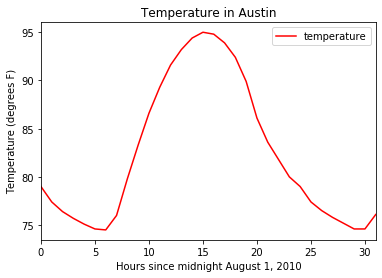

In [9]:
# Create a plot with color='red'
df.plot(c='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')


# Display the plot
plt.show()

## pandas line plots
In the previous chapter, you saw that the `.plot()` method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from Yahoo Finance. Your job is to plot the 'Month' column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

In [21]:
df = pd.read_csv('../data/stocks.txt', sep=',')
df.drop(columns=['index'], inplace=True)
df

,Month,AAPL,GOOG,IBM
0,Jan,117.160004,534.522445,153.309998
1,Feb,128.460007,558.402511,161.940002
2,Mar,124.430000,548.002468,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994
5,Jun,125.430000,520.510010,162.660004
6,Jul,121.300003,625.609985,161.990005
7,Aug,112.760002,618.250000,147.889999
8,Sep,110.300003,608.419983,144.970001
9,Oct,119.500000,710.809998,140.080002


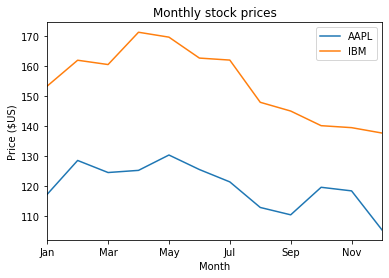

In [22]:
# Create a list of y-axis column names: y_columns
y_columns = ['AAPL','IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

## pandas box plots
While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The `.plot()` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

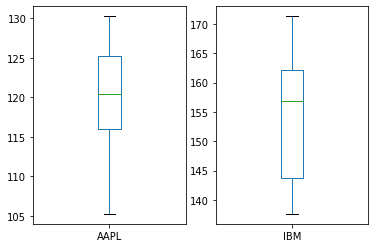

In [23]:
# Make a list of the column names to be plotted: cols
cols = ['AAPL','IBM']

# Generate the box plots
df[cols].plot(kind='box',subplots=True)

# Display the plot
plt.show()

## pandas scatter plots
Pandas scatter plots are generated using the `kind='scatter'` keyword argument. Scatter plots require that the x and y columns be chosen by specifying the x and y parameters inside `.plot()`. Scatter plots also take an s keyword argument to provide the radius of each circle to plot in pixels.

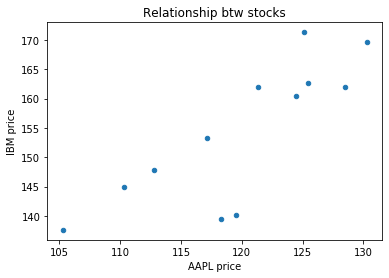

In [27]:
# Generate a scatter plot
df.plot(kind='scatter', x='AAPL', y='IBM')

# Add the title
plt.title('Relationship btw stocks')

# Add the x-axis label
plt.xlabel('AAPL price')

# Add the y-axis label
plt.ylabel('IBM price')

# Display the plot
plt.show()

In [34]:
df = pd.read_csv('../data/tips.csv', sep=',')
df

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## pandas hist, pdf and cdf
Pandas relies on the `.hist()` method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the Seaborn package.

Your job is to plot a PDF and CDF for the fraction column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the PDF, you need to specify `normed=True` in your call to `hist()`, and when plotting the CDF, you need to specify `cumulative=True` in addition to normed=True.

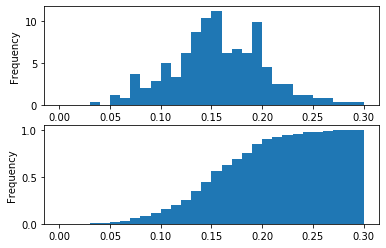

In [73]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], x='hist', kind='hist', normed=True, range=(0,.3),bins=30)

# Plot the CDF
df.fraction.plot(ax=axes[1], x='hist', normed=True, cumulative=True, kind='hist', bins=30,range=(0,.3))
plt.show()

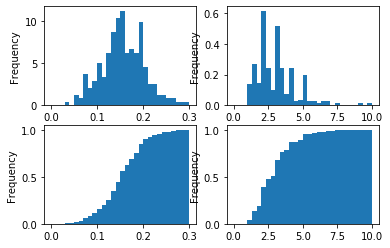

In [81]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=2)

# Plot the PDF
df.fraction.plot(ax=axes[0][0], x='hist', kind='hist', normed=True, range=(0,.3),bins=30)
df.fraction.plot(ax=axes[1][0], x='hist', normed=True, cumulative=True, kind='hist', bins=30,range=(0,.3))


df.tip.plot(ax=axes[0][1], x='hist', kind='hist', normed=True, range=(0,10.),bins=30)
df.tip.plot(ax=axes[1][1], x='hist', normed=True, cumulative=True, kind='hist', bins=30,range=(0,10.))

plt.show()

In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the Digest of Education Statistics.

Your job is to compute the minimum and maximum values of the 'Engineering' column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the `.mean()` method with the keyword argument `axis='columns'`. This computes the mean across all columns per row.

In [91]:
df = pd.read_csv('../data/bachelors.csv', sep=',')
df.set_index('Year', inplace=True)
df.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


0.8
19.0


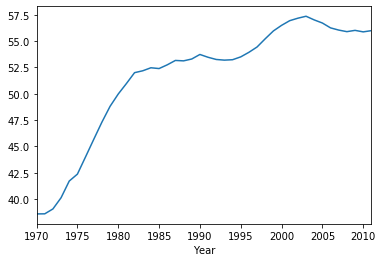

In [92]:
# Print the minimum value of the Engineering column
print(df['Engineering'].min())

# Print the maximum value of the Engineering column
print(df['Engineering'].max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot(x='Year')

# Display the plot
plt.show()

In [93]:
df.describe()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,33.848165,33.685540,61.100000,49.429864,40.653471,56.216667,25.809524,76.356236,12.892857,66.186680,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.552731,9.574057,1.305336,10.087725,13.116109,8.698610,6.688753,2.212641,5.670824,1.950990,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,4.229798,11.921005,58.600000,29.088363,9.064439,35.300000,13.600000,72.166525,0.800000,61.647206,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,30.840814,28.520709,60.200000,44.311821,37.390851,55.125000,19.125000,74.994573,10.625000,65.583807,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,33.317552,35.994852,61.300000,50.971469,47.210123,59.850000,27.300000,75.937020,14.100000,66.112018,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,45.663953,40.790605,62.000000,58.679194,48.876139,62.125000,29.775000,78.619420,16.950000,67.861247,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,50.037182,44.499331,63.400000,62.169456,50.552335,64.600000,37.100000,79.618625,19.000000,68.894487,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


In [95]:
df.quantile([0.05, 0.95])

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0.05,7.532355,13.293445,59.105,29.877106,10.671244,36.690,14.975,72.821403,1.220,62.428895,69.310,77.115,40.225,14.980,47.74,64.36,36.420
0.95,48.630622,43.336497,63.195,61.875421,50.258932,63.685,36.270,79.420988,18.695,68.578155,74.885,85.995,47.780,41.695,77.69,81.89,51.485


In [111]:
global_mean = df.Agriculture.mean()
mean_2010 = df.loc[df.index==2010, 'Agriculture'].iloc[0]
print(mean_2010-global_mean)

14.881877122452373
